# Exploratory Data Analysis (EDA)

## Introduction and preliminary data organization

Data set source
https://www.kaggle.com/datasets/bandikarthik/movie-recommendation-system

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import datetime

In [3]:
# read movies data
dfMovies = pd.read_csv('data/movies.csv')

In [4]:
dfMovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# checking data type
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


In [6]:
# checking table shape
dfMovies.shape

(34208, 3)

In [7]:
# checking file with links
dfLinks = pd.read_csv('data/links.csv')
dfLinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
dfLinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  34208 non-null  int64  
 1   imdbId   34208 non-null  int64  
 2   tmdbId   33912 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 801.9 KB


In [9]:
# read ratings
dfRatings = pd.read_csv('data/ratings.csv')

In [10]:
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


In [11]:
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 698.4 MB


In [12]:
# read tags
dfTags = pd.read_csv('data/tags.csv')
dfTags.head()

,userId,movieId,tag,timestamp
0,19,2324,bittersweet,1428651158
1,19,2324,holocaust,1428651112
2,19,2324,World War II,1428651118
3,23,7075,hilarious,1378675786
4,23,7075,Underrated,1378675786


Cleaning stage

In [13]:
# checking movies table and the column movieId
dfMovies['movieId'].dtype

dtype('int64')

In [14]:
# checking if any of the movieId is missing
dfMovies['movieId'].isna().sum()

0

In [15]:
# split title string - to get title and date separately, delete not needed column and rename the columns which left
dfTmp =dfMovies['title'].str.split(r'(\(\d\d\d\d\))', expand=True) \
.drop(columns=2) \
.rename(columns={0: 'title', 1: 'year'})

dfMovies['title'] = dfTmp['title']
# Remove braces from date
dfMovies['year'] = dfTmp['year'].str.strip('()')
del dfTmp
dfMovies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [16]:
dfMovies['year'].dtype

dtype('O')

In [17]:
dfMovies['year'].isna().sum()

68

In [18]:
# assign -1 to movies where year of production is missing - to not lost the rows but to make filtering easier later on
dfMovies['year'] = dfMovies['year'].fillna(-1).astype(np.int16)
dfMovies['year'].dtype

dtype('int16')

In [19]:
dfMovies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [20]:
dfMovies['genres'].isna().sum()

0

In [21]:
dfMovies['genres']

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
34203                                       Thriller
34204                             (no genres listed)
34205                                          Drama
34206                                   Drama|Sci-Fi
34207                             (no genres listed)
Name: genres, Length: 34208, dtype: object

In [22]:
dfMovies['genres'] = dfMovies['genres'].replace({'(no genres listed)': ''}) \
.str.lower() \
.str.split('|') \
.apply(lambda x: frozenset(x)) # to sort e.g. against the number of assigned categories

dfMovies

,movieId,title,genres,year
0,1,Toy Story,"(animation, adventure, fantasy, comedy, children)",1995
1,2,Jumanji,"(children, fantasy, adventure)",1995
2,3,Grumpier Old Men,"(comedy, romance)",1995
3,4,Waiting to Exhale,"(drama, comedy, romance)",1995
4,5,Father of the Bride Part II,(comedy),1995
...,...,...,...,...
34203,151697,Grand Slam,(thriller),1967
34204,151701,Bloodmoney,(),2010
34205,151703,The Butterfly Circus,(drama),2009
34206,151709,Zero,"(drama, sci-fi)",2015


In [23]:
# save cleaned data set
dfMovies.to_pickle('data/movies-clean.pkl')
del dfMovies

In [24]:
# clean ratings data
dfRatings = pd.read_csv('data/ratings.csv', usecols=['movieId','rating','timestamp'])
dfRatings.head()

,movieId,rating,timestamp
0,169,2.5,1204927694
1,2471,3.0,1204927438
2,48516,5.0,1204927435
3,2571,3.5,1436165433
4,109487,4.0,1436165496


In [25]:
dfRatings['movieId'].dtype

dtype('int64')

In [26]:
dfRatings['timestamp']

0           1204927694
1           1204927438
2           1204927435
3           1436165433
4           1436165496
               ...    
22884372    1430437962
22884373    1430437984
22884374    1430437968
22884375    1430437811
22884376    1430437721
Name: timestamp, Length: 22884377, dtype: int64

In [27]:
dfRatings['timestamp'] = pd.to_datetime(dfRatings['timestamp'], unit='s')

In [28]:
dfRatings

,movieId,rating,timestamp
0,169,2.5,2008-03-07 22:08:14
1,2471,3.0,2008-03-07 22:03:58
2,48516,5.0,2008-03-07 22:03:55
3,2571,3.5,2015-07-06 06:50:33
4,109487,4.0,2015-07-06 06:51:36
...,...,...,...
22884372,49530,5.0,2015-04-30 23:52:42
22884373,69481,3.0,2015-04-30 23:53:04
22884374,74458,4.0,2015-04-30 23:52:48
22884375,76093,5.0,2015-04-30 23:50:11


In [29]:
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   rating     float64       
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 523.8 MB


In [30]:
dfRatings['rating'].min()

0.5

In [31]:
dfRatings['rating'].max()

5.0

In [32]:
# decrease memory consumption via changing data type - rating is only from 0 to 5 - in case of this data set
# from 0.5 to 5.0
dfRatings['rating'] = dfRatings['rating'].astype(np.float16)

In [33]:
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   rating     float16       
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int64(1)
memory usage: 392.8 MB


In [34]:
# save clean ratings data
dfRatings.to_pickle('data/ratings-clean.pkl')
del dfRatings

## Data Analysis

In [35]:
# read clean data
df = pd.read_pickle('data/movies-clean.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
 3   year     34208 non-null  int16 
dtypes: int16(1), int64(1), object(2)
memory usage: 868.7+ KB


In [36]:
df.head()

,movieId,title,genres,year
0,1,Toy Story,"(animation, adventure, fantasy, comedy, children)",1995
1,2,Jumanji,"(adventure, fantasy, children)",1995
2,3,Grumpier Old Men,"(comedy, romance)",1995
3,4,Waiting to Exhale,"(drama, comedy, romance)",1995
4,5,Father of the Bride Part II,(comedy),1995


In [37]:
# lets check which film is the oldest
df[df[df['year'] > 0]['year'].min() == df['year']]

,movieId,title,genres,year
33313,148054,Passage de Venus,(documentary),1874


In [38]:
# lets check the newest
df[df['year'].max() == df['year']]

,movieId,title,genres,year
26472,122894,Avatar 2,"(adventure, action, fantasy)",2016
30459,138210,13 Hours,(drama),2016
30926,139857,Colonia,(thriller),2016
33343,148172,The 5th Wave,"(sci-fi, thriller, adventure)",2016
33654,149406,Kung Fu Panda 3,"(action, animation, adventure)",2016
33895,150194,Quo vado?,(comedy),2016
33920,150294,The Forest,"(horror, thriller)",2016
33973,150548,Sherlock: The Abominable Bride,"(thriller, action, crime, mystery, drama)",2016
33996,150602,Band of Robbers,"(comedy, crime, thriller, adventure)",2016
34026,150724,Army Dog,(),2016


In [39]:
# how many movies were created in each year from the oldest to the newest - time span
# when the oldest movie was created till the time when the newest was created

# first we have to aggregate data
df['movieId'].duplicated().sum() # each key is unique if result is zero

0

In [40]:
df[['movieId','year']]

,movieId,year
0,1,1995
1,2,1995
2,3,1995
3,4,1995
4,5,1995
...,...,...
34203,151697,1967
34204,151701,2010
34205,151703,2009
34206,151709,2015


In [41]:
df[['movieId','year']].groupby('year').count()

,movieId
year,
-1,68
1874,1
1878,1
1887,1
1888,2
...,...
2012,1387
2013,1476
2014,1420


In [42]:
# filter out - to not see the movies where production year is missing (-1)
df[['movieId','year']].groupby('year').count().loc[0:]

,movieId
year,
1874,1
1878,1
1887,1
1888,2
1890,3
...,...
2012,1387
2013,1476
2014,1420


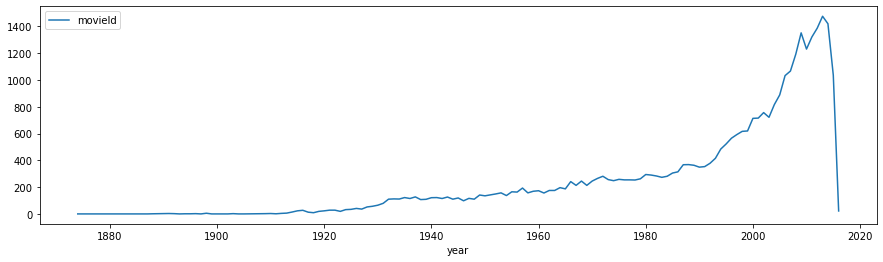

In [43]:
# display results
df[['movieId','year']].groupby('year').count().loc[0:].plot(figsize=(15,4));

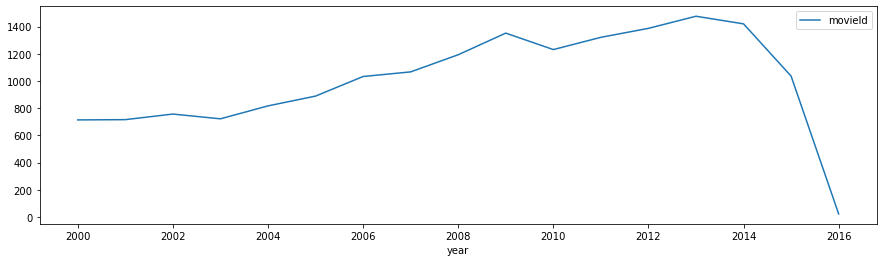

In [44]:
df[['movieId','year']].groupby('year').count().loc[2000:].plot(figsize=(15,4));

In [45]:
# film genres distribution in data set
df['genres']

0        (animation, adventure, fantasy, comedy, children)
1                           (adventure, fantasy, children)
2                                        (comedy, romance)
3                                 (drama, comedy, romance)
4                                                 (comedy)
                               ...                        
34203                                           (thriller)
34204                                                   ()
34205                                              (drama)
34206                                      (drama, sci-fi)
34207                                                   ()
Name: genres, Length: 34208, dtype: object

In [46]:
df['genres'].apply(lambda x: list(x))

0        [animation, adventure, fantasy, comedy, children]
1                           [adventure, fantasy, children]
2                                        [comedy, romance]
3                                 [drama, comedy, romance]
4                                                 [comedy]
                               ...                        
34203                                           [thriller]
34204                                                   []
34205                                              [drama]
34206                                      [drama, sci-fi]
34207                                                   []
Name: genres, Length: 34208, dtype: object

In [47]:
df['genres'] = df['genres'].apply(lambda x: list(x))
df1 = df.explode('genres')
df1

,movieId,title,genres,year
0,1,Toy Story,animation,1995
0,1,Toy Story,adventure,1995
0,1,Toy Story,fantasy,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,children,1995
...,...,...,...,...
34204,151701,Bloodmoney,,2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,drama,2015
34206,151709,Zero,sci-fi,2015


In [48]:
df1['genres'].value_counts()

drama          15774
comedy         10124
thriller        5300
romance         4875
action          4445
crime           3446
horror          3365
documentary     3040
adventure       2763
sci-fi          2156
mystery         1837
fantasy         1692
children        1609
animation       1387
war             1345
                1145
musical         1052
western          779
film-noir        338
imax             196
Name: genres, dtype: int64

In [49]:
df1['genres'].value_counts().sort_values(ascending=True)

imax             196
film-noir        338
western          779
musical         1052
                1145
war             1345
animation       1387
children        1609
fantasy         1692
mystery         1837
sci-fi          2156
adventure       2763
documentary     3040
horror          3365
crime           3446
action          4445
romance         4875
thriller        5300
comedy         10124
drama          15774
Name: genres, dtype: int64

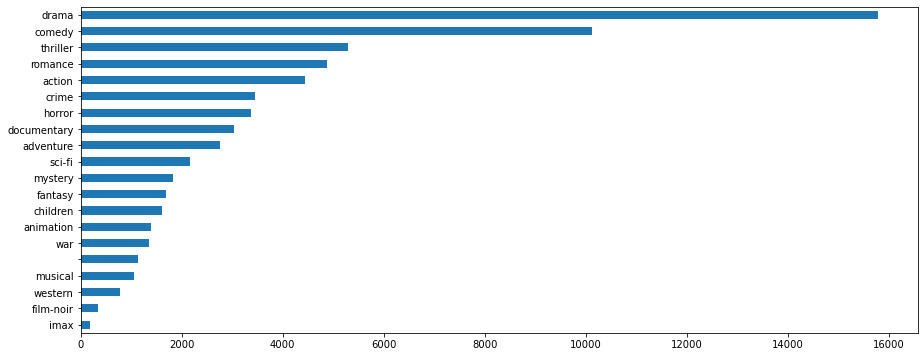

In [50]:
# ilustrate the result
df1['genres'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(15,6));

In [51]:
# check movies assigned to more than one category (genre)
df['genres'].apply(len)

0        5
1        3
2        2
3        3
4        1
        ..
34203    1
34204    1
34205    1
34206    2
34207    1
Name: genres, Length: 34208, dtype: int64

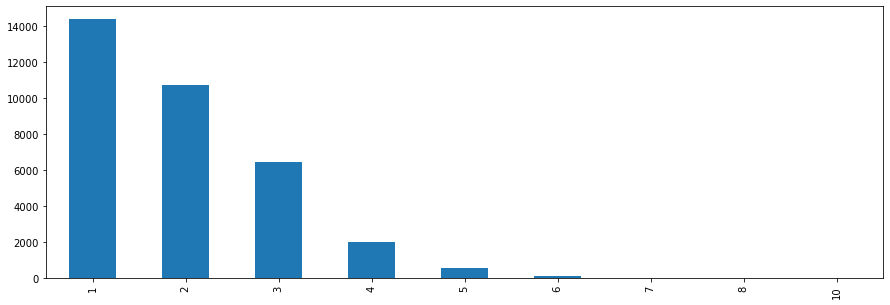

In [52]:
df['genres'].apply(len).value_counts().plot(kind='bar', figsize=(15, 5));

In [53]:
# movies in the context of decades, e.g. movies from 60's, 70's etc
df2 = df1[df1['year'] > 1940]
df2

,movieId,title,genres,year
0,1,Toy Story,animation,1995
0,1,Toy Story,adventure,1995
0,1,Toy Story,fantasy,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,children,1995
...,...,...,...,...
34204,151701,Bloodmoney,,2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,drama,2015
34206,151709,Zero,sci-fi,2015


In [54]:
# grouping movies to sub-groups (bucketizing), e.g. movies produced in 50's, 60's etc
pd.cut(df2['year'], bins=range(1940, 2030, 10), labels=[f"{x}s" for x in range(40,100,10)] + ['2000s','2010s'])

0          90s
0          90s
0          90s
0          90s
0          90s
         ...  
34204    2000s
34205    2000s
34206    2010s
34206    2010s
34207      70s
Name: year, Length: 63231, dtype: category
Categories (8, object): ['40s' < '50s' < '60s' < '70s' < '80s' < '90s' < '2000s' < '2010s']

In [55]:
df2['times'] = pd.cut(df2['year'], bins=range(1940, 2030, 10), labels=[f"{x}s" for x in range(40,100,10)] + ['2000s','2010s'])
df2

C:\Users\Sylwia\AppData\Local\Temp\ipykernel_2628\2872012751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['times'] = pd.cut(df2['year'], bins=range(1940, 2030, 10), labels=[f"{x}s" for x in range(40,100,10)] + ['2000s','2010s'])


,movieId,title,genres,year,times
0,1,Toy Story,animation,1995,90s
0,1,Toy Story,adventure,1995,90s
0,1,Toy Story,fantasy,1995,90s
0,1,Toy Story,comedy,1995,90s
0,1,Toy Story,children,1995,90s
...,...,...,...,...,...
34204,151701,Bloodmoney,,2010,2000s
34205,151703,The Butterfly Circus,drama,2009,2000s
34206,151709,Zero,drama,2015,2010s
34206,151709,Zero,sci-fi,2015,2010s


In [56]:
# How the production was increasing in the context of genres
df3 = df2[['movieId','genres','times']] \
.groupby(by=['genres','times']) \
.count() \
.rename(columns={'movieId': 'production_count'}) \
.fillna(0) \
.astype(int) \
.unstack()

df3

production_count                                         
times                    40s  50s   60s   70s   80s   90s 2000s 2010s
genres                                                               
                          27   45    68   128   106   168   206   293
action                    76  100   231   446   531   754  1360   857
adventure                 84  166   215   215   332   398   743   458
animation                 27   19    45    66   144   221   497   329
children                  37   36    78   111   172   344   500   298
comedy                   307  339   582   667  1097  1806  2975  1757
crime                    176  189   195   348   290   531  1011   520
documentary               27   22    75   126   120   328  1250  1040
drama                    650  862  1008  1141  1297  2498  4699  2695
fantasy                   47   47    95   105   215   269   555   288
film-noir                168   86     6     6    17    14    18     7
horror                    52  117   188   371   448   388  1040   673
imax                       0    0     0     0     2    21    70   103
musical                  111  115    89    93    93   108   236    79
mystery                  132   62   102   191   128   223   584   291
romance                  301  296   231   208   378   834  1448   670
sci-fi                    14  128   145   177   312   340   560   430
thriller                 154  145   197   416   436   849  1847  1158
war                      133  156   163   102   120   125   321   130
western                   79  160   151   112    35    54    66    38

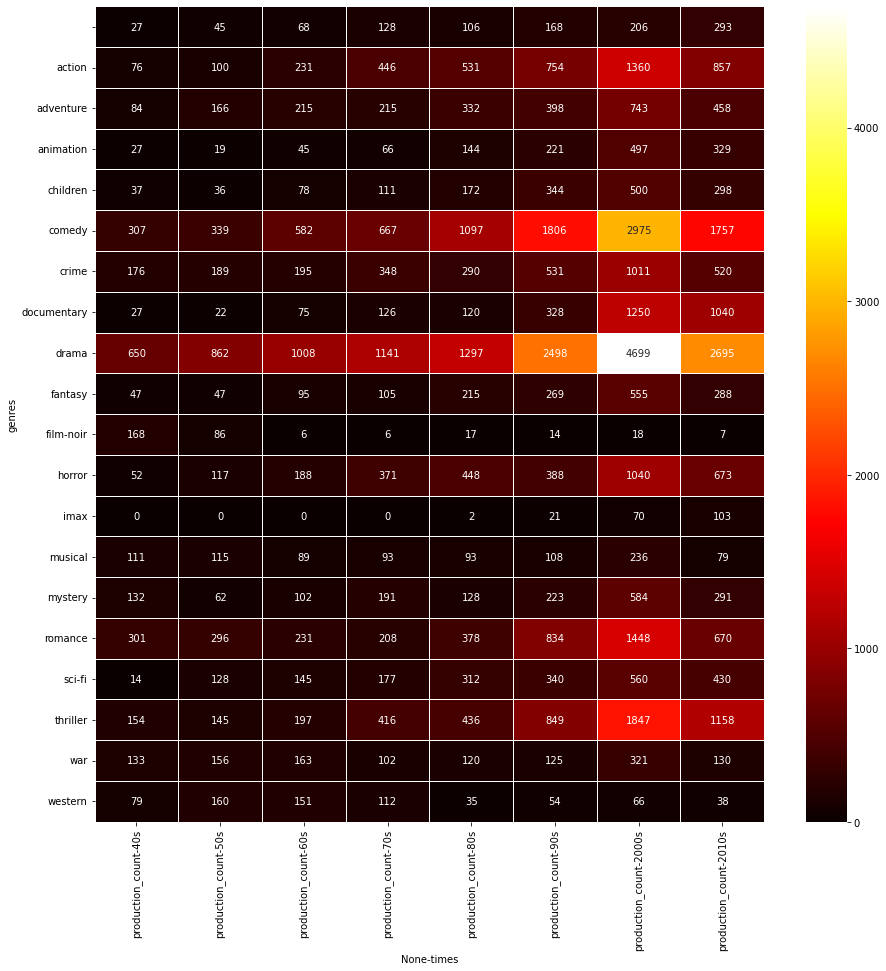

In [61]:
# show trends in different years in the context of the film type (genre)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df3,cmap='hot',annot=True,fmt='1',ax=ax,linewidth=0.5);

## Data Analysis - movies ratings

In [62]:
del df
del df1
del df2
del df3

In [63]:
# read ratings
df = pd.read_pickle('data/ratings-clean.pkl')
df

,movieId,rating,timestamp
0,169,2.5,2008-03-07 22:08:14
1,2471,3.0,2008-03-07 22:03:58
2,48516,5.0,2008-03-07 22:03:55
3,2571,3.5,2015-07-06 06:50:33
4,109487,4.0,2015-07-06 06:51:36
...,...,...,...
22884372,49530,5.0,2015-04-30 23:52:42
22884373,69481,3.0,2015-04-30 23:53:04
22884374,74458,4.0,2015-04-30 23:52:48
22884375,76093,5.0,2015-04-30 23:50:11


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   rating     float16       
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int64(1)
memory usage: 392.8 MB


In [69]:
# looking for correlation between production year, genre and rating

In [70]:
df['rating'].min()

0.5

In [71]:
df['rating'].max()

5.0

In [72]:
df['rating'].isna().sum()

0

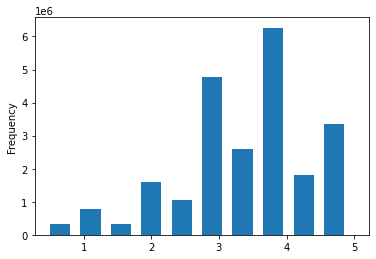

In [73]:
# checking distribution via presenting data in histogram
df['rating'].plot(kind='hist',bins=10,width=0.3);

In [74]:
df['rating'].value_counts()

4.0    6265623
3.0    4783899
5.0    3358218
3.5    2592375
4.5    1813922
2.0    1603254
2.5    1044176
1.0     769654
1.5     337605
0.5     315651
Name: rating, dtype: int64

In [75]:
# bucketizing ratings
df['rating'].value_counts(bins=np.linspace(0,5,num=6))

(3.0, 4.0]       8857998
(2.0, 3.0]       5828075
(4.0, 5.0]       5172140
(1.0, 2.0]       1940859
(-0.001, 1.0]    1085305
Name: rating, dtype: int64

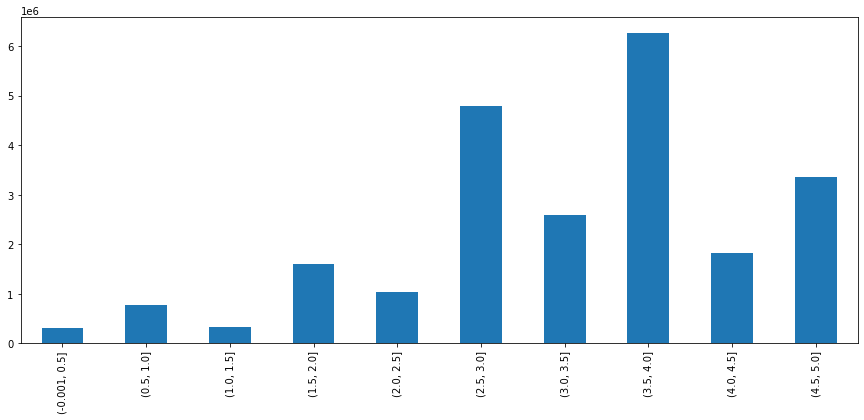

In [76]:
df['rating'].value_counts(bins=np.linspace(0,5,num=11)).sort_index().plot(kind='bar',figsize=(15,6));

In [77]:
# join ratings with movies data set
dfm = pd.read_pickle('data/movies-clean.pkl')

In [78]:
df[['movieId','rating']] \
.groupby('movieId') \
.agg({'rating': ['mean','std','count']})

rating                 
             mean       std  count
movieId                           
1        3.894531  0.917573  60424
2        3.220703  0.956524  23950
3        3.179688  1.011466  15267
4        2.878906  1.105317   2935
5        3.080078  0.987952  14769
...           ...       ...    ...
151697   3.000000       NaN      1
151701   4.000000       NaN      1
151703   5.000000       NaN      1
151709   3.500000       NaN      1
151711   4.000000       NaN      1

[33670 rows x 3 columns]

In [79]:
# deal with data where count is 1 to have some statistic - e.g. lets assume that votes are measurable if for specific movie 
# at least 100 people voted
dfq = df[['movieId','rating']] \
.groupby('movieId') \
.agg({'rating': ['mean','std','count']})
dfq = dfq[dfq['rating']['count'] > 100]
dfq

rating                 
             mean       std  count
movieId                           
1        3.894531  0.917573  60424
2        3.220703  0.956524  23950
3        3.179688  1.011466  15267
4        2.878906  1.105317   2935
5        3.080078  0.987952  14769
...           ...       ...    ...
143385   3.787109  0.730492    398
146656   3.794922  0.770152    156
148238   2.457031  1.116179    107
148626   3.937500  0.825619    276
150548   3.744141  0.879143    151

[9062 rows x 3 columns]

In [80]:
pd.concat([dfq['rating']['mean'],dfq['rating']['std']],axis=1).reset_index()

,movieId,mean,std
0,1,3.894531,0.917573
1,2,3.220703,0.956524
2,3,3.179688,1.011466
3,4,2.878906,1.105317
4,5,3.080078,0.987952
...,...,...,...
9057,143385,3.787109,0.730492
9058,146656,3.794922,0.770152
9059,148238,2.457031,1.116179
9060,148626,3.937500,0.825619


In [81]:
dfq = pd.concat([dfq['rating']['mean'],dfq['rating']['std']],axis=1).reset_index()

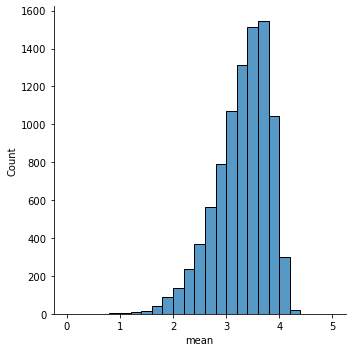

In [82]:
# ilustrate the results
sns.displot(dfq['mean'],bins=np.linspace(0,5,num=26));

In [83]:
dfq[dfq['mean'] < dfq['mean'].quantile(0.005)].drop_duplicates()

,movieId,mean,std
1124,1323,1.620117,0.999614
1265,1495,1.403320,1.082217
1340,1599,1.677734,1.071550
1448,1739,1.575195,1.087333
1497,1826,1.198242,0.930694
1637,1989,1.538086,1.030078
1638,1990,1.448242,1.020674
1989,2386,1.633789,1.046343
2049,2449,1.675781,1.148392
2370,2818,1.616211,0.991579


In [84]:
bad_movies = dfq[dfq['mean'] < dfq['mean'].quantile(0.005)].drop_duplicates()

In [85]:
dfm.merge(bad_movies, on='movieId', how='inner').sort_values(by='mean',ascending=True).head()

,movieId,title,genres,year,mean,std
38,8859,SuperBabies: Baby Geniuses 2,(comedy),2004,0.851562,0.788178
33,6483,From Justin to Kelly,"(musical, romance)",2003,0.985352,0.845644
22,4775,Glitter,"(drama, musical, romance)",2001,1.135742,0.861708
34,6587,Gigli,"(comedy, crime, romance)",2003,1.170898,0.918029
4,1826,Barney's Great Adventure,"(adventure, children)",1998,1.198242,0.930694


In [86]:
# the best movies
great_movies = dfq[dfq['mean'] > dfq['mean'].quantile(0.995)].drop_duplicates()

In [87]:
dfm.merge(great_movies, on='movieId', how='inner').sort_values(by='mean',ascending=False).head(20)

,movieId,title,genres,year,mean,std
2,318,"Shawshank Redemption, The","(drama, crime)",1994,4.441406,0.733828
6,858,"Godfather, The","(drama, crime)",1972,4.355469,0.854273
0,50,"Usual Suspects, The","(crime, thriller, mystery)",1995,4.320312,0.770791
3,527,Schindler's List,"(drama, war)",1993,4.289062,0.849629
23,1221,"Godfather: Part II, The","(drama, crime)",1974,4.269531,0.875126
28,2019,Seven Samurai (Shichinin no samurai),"(drama, action, adventure)",1954,4.261719,0.860219
7,904,Rear Window,"(thriller, mystery)",1954,4.246094,0.780906
16,1193,One Flew Over the Cuckoo's Nest,(drama),1975,4.242188,0.785204
31,2959,Fight Club,"(drama, action, crime, thriller)",1999,4.234375,0.869965
9,912,Casablanca,"(drama, romance)",1942,4.230469,0.891884


## Advanced Data Analysis

In [88]:
# connection between ratings and movies popularity
# aggregate in time 'M' - months

<AxesSubplot:xlabel='timestamp'>

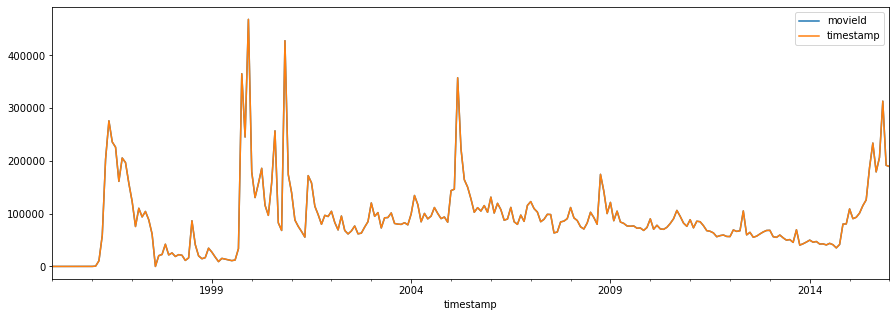

In [89]:
df[['movieId','timestamp']].resample('M',on='timestamp').count().plot(figsize=(15,5))

<AxesSubplot:xlabel='timestamp'>

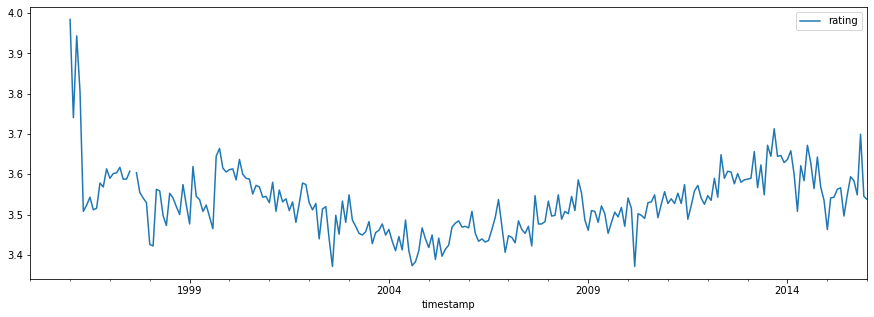

In [90]:
df[['rating','timestamp']].resample('M',on='timestamp').mean().plot(figsize=(15,5))

In [91]:
# pick first 20 the most popular movies
df[['movieId','rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .head(20) \
    .merge(dfm, left_index=True, right_on='movieId',how='left') \
    .merge(dfq, on='movieId', how='left') \
    .sort_values(by='std', ascending=False)

,#votes,movieId,title,genres,year,mean,std
14,53829,780,Independence Day (a.k.a. ID4),"(action, sci-fi, thriller, adventure)",1996,3.396484,1.054630
1,79091,296,Pulp Fiction,"(drama, comedy, crime, thriller)",1994,4.164062,0.984206
7,61267,110,Braveheart,"(drama, action, war)",1995,4.035156,0.961638
5,67092,260,Star Wars: Episode IV - A New Hope,"(action, sci-fi, adventure)",1977,4.156250,0.958329
0,81296,356,Forrest Gump,"(drama, comedy, war, romance)",1994,4.046875,0.948040
4,69545,480,Jurassic Park,"(action, sci-fi, thriller, adventure)",1993,3.652344,0.943379
11,56255,1210,Star Wars: Episode VI - Return of the Jedi,"(action, sci-fi, adventure)",1983,3.992188,0.934624
15,53331,1196,Star Wars: Episode V - The Empire Strikes Back,"(action, sci-fi, adventure)",1980,4.160156,0.919852
8,60424,1,Toy Story,"(animation, adventure, fantasy, comedy, children)",1995,3.894531,0.917573
6,64830,2571,"Matrix, The","(action, sci-fi, thriller)",1999,4.171875,0.909464


In [92]:
# pick first 20 the most popular movies
df[['movieId','rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .head(20) \
    .merge(dfm, left_index=True, right_on='movieId',how='left') \
    .merge(dfq, on='movieId', how='left') \
    # .sort_values(by='std', ascending=False)

,#votes,movieId,title,genres,year,mean,std
0,81296,356,Forrest Gump,"(drama, comedy, war, romance)",1994,4.046875,0.948040
1,79091,296,Pulp Fiction,"(drama, comedy, crime, thriller)",1994,4.164062,0.984206
2,77887,318,"Shawshank Redemption, The","(drama, crime)",1994,4.441406,0.733828
3,76271,593,"Silence of the Lambs, The","(horror, crime, thriller)",1991,4.160156,0.867515
4,69545,480,Jurassic Park,"(action, sci-fi, thriller, adventure)",1993,3.652344,0.943379
5,67092,260,Star Wars: Episode IV - A New Hope,"(action, sci-fi, adventure)",1977,4.156250,0.958329
6,64830,2571,"Matrix, The","(action, sci-fi, thriller)",1999,4.171875,0.909464
7,61267,110,Braveheart,"(drama, action, war)",1995,4.035156,0.961638
8,60424,1,Toy Story,"(animation, adventure, fantasy, comedy, children)",1995,3.894531,0.917573
9,59857,527,Schindler's List,"(drama, war)",1993,4.289062,0.849629


In [187]:
# checking the correlation between rating and how the movie popular is
# popular movie doesn't have to mean high rating - lets check how it looks like

In [93]:
dfq['mean'].mean()

3.299

In [94]:
dfc = df[['movieId','rating']] \
    .groupby('movieId') \
    .count() \
    .sort_values(by='rating', ascending=False) \
    .rename(columns={'rating': '#votes'}) \
    .merge(dfm, left_index=True, right_on='movieId',how='inner') \
    .merge(dfq, on='movieId', how='inner') \
    .sort_values(by='std', ascending=False)
dfc

,#votes,movieId,title,genres,year,mean,std
6801,230,74754,"Room, The","(drama, comedy, romance)",2003,2.400391,1.767860
7783,158,1311,Santa with Muscles,(comedy),1996,2.597656,1.760735
8301,133,59295,Expelled: No Intelligence Allowed,(documentary),2008,2.074219,1.620765
8128,141,70946,Troll 2,"(horror, fantasy)",1990,2.091797,1.615331
8961,104,50703,"Secret, The",(documentary),2006,2.673828,1.597585
...,...,...,...,...,...,...,...
3125,1164,58303,"Counterfeiters, The (Die Fälscher)","(drama, crime, war)",2007,3.949219,0.663578
8580,120,7050,Follow the Fleet,"(musical, comedy, romance)",1936,3.716797,0.663367
8458,125,46156,"Ax, The (couperet, Le)","(comedy, crime)",2005,3.804688,0.656530
8548,121,99574,Promised Land,(drama),2012,3.343750,0.612485


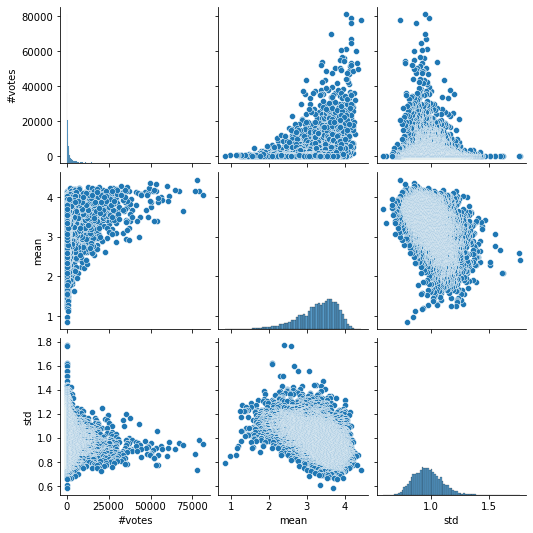

In [95]:
# lets see paticualr columns distribution
sns.pairplot(dfc[['#votes','mean','std']])

In [96]:
# lets add one more dimension to this analysis
# and see how distributions differ for genres
dfg = dfc[['#votes','mean','std','genres']].copy()
dfg['genres'] = dfg['genres'].apply(lambda x: list(x))
dfg = dfg.explode('genres')
dfg

,#votes,mean,std,genres
6801,230,2.400391,1.767860,drama
6801,230,2.400391,1.767860,comedy
6801,230,2.400391,1.767860,romance
7783,158,2.597656,1.760735,comedy
8301,133,2.074219,1.620765,documentary
...,...,...,...,...
8458,125,3.804688,0.656530,comedy
8458,125,3.804688,0.656530,crime
8548,121,3.343750,0.612485,drama
8295,133,3.691406,0.586211,drama


In [97]:
dfgg = dfg[dfg['genres'].isin(['drama','comedy'])]
dfgg

,#votes,mean,std,genres
6801,230,2.400391,1.767860,drama
6801,230,2.400391,1.767860,comedy
7783,158,2.597656,1.760735,comedy
8210,137,3.419922,1.471836,drama
8210,137,3.419922,1.471836,comedy
...,...,...,...,...
8580,120,3.716797,0.663367,comedy
8458,125,3.804688,0.656530,comedy
8548,121,3.343750,0.612485,drama
8295,133,3.691406,0.586211,drama


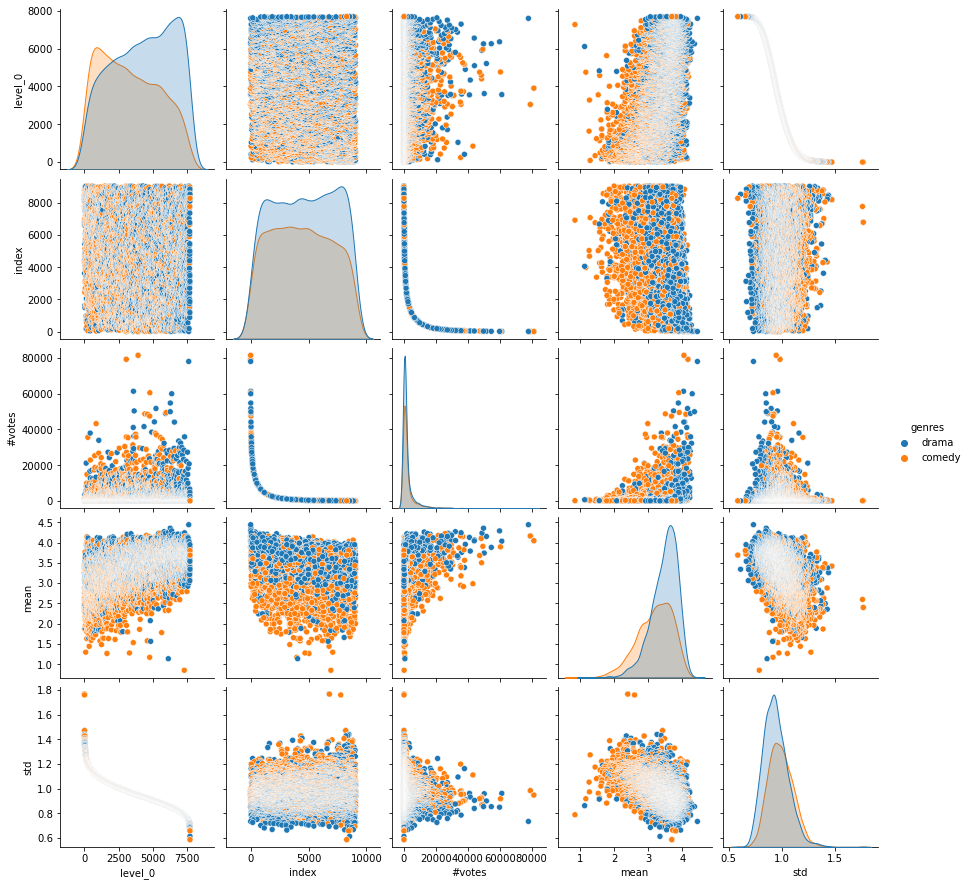

In [99]:
# it's better to watch good drama than average comedy
dfgg = dfgg.reset_index()
sns.pairplot(dfgg,hue='genres');

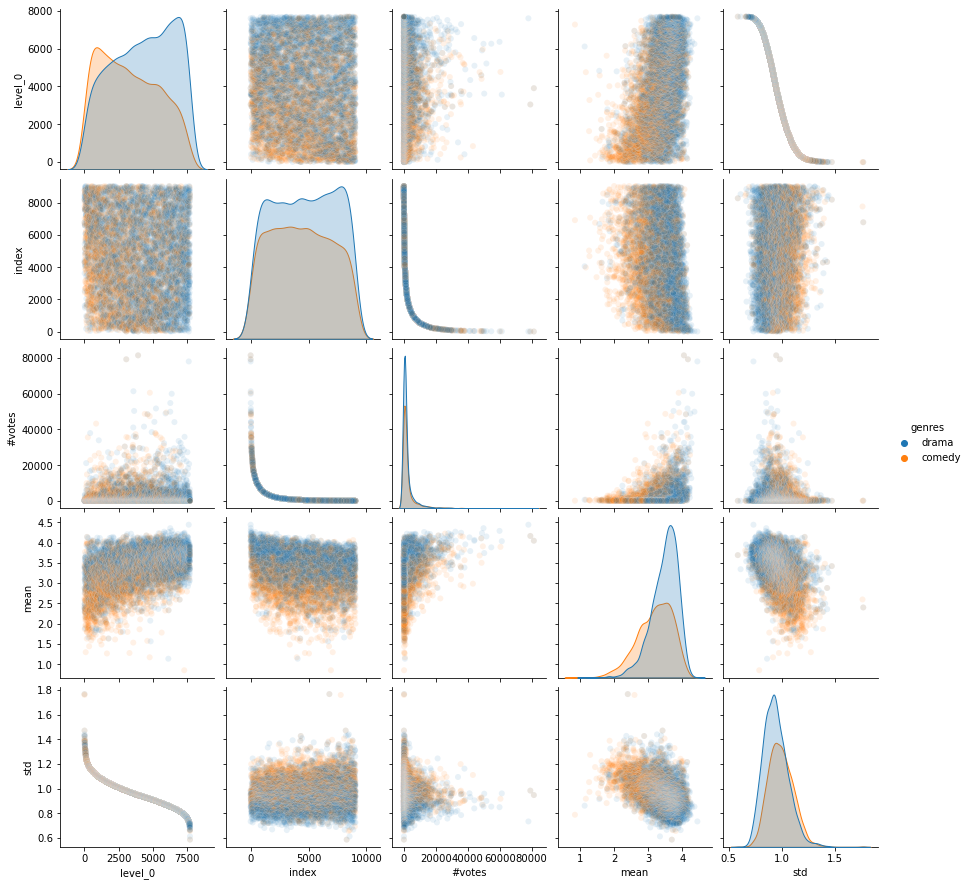

In [100]:
sns.pairplot(dfgg,hue='genres',plot_kws={'alpha': 0.1});

# Polynomial regression

In [101]:
# limit to one title
dfm[dfm['title'].str.contains('Star Wars')]

,movieId,title,genres,year
257,260,Star Wars: Episode IV - A New Hope,"(action, sci-fi, adventure)",1977
1171,1196,Star Wars: Episode V - The Empire Strikes Back,"(action, sci-fi, adventure)",1980
1184,1210,Star Wars: Episode VI - Return of the Jedi,"(action, sci-fi, adventure)",1983
2544,2628,Star Wars: Episode I - The Phantom Menace,"(action, sci-fi, adventure)",1999
5282,5378,Star Wars: Episode II - Attack of the Clones,"(imax, action, sci-fi, adventure)",2002
10123,33493,Star Wars: Episode III - Revenge of the Sith,"(action, sci-fi, adventure)",2005
12943,61160,Star Wars: The Clone Wars,"(action, animation, sci-fi, adventure)",2008
15535,79006,Empire of Dreams: The Story of the 'Star Wars'...,(documentary),2004
20456,100089,Star Wars Uncut: Director's Cut,"(western, animation, action, comedy, sci-fi)",2012
23103,109713,Star Wars: Threads of Destiny,"(action, sci-fi, adventure)",2014


In [102]:
dfsw = dfm[dfm['title'].str.contains('Star Wars: Episode')].sort_values(by='title')
dfsw

,movieId,title,genres,year
2544,2628,Star Wars: Episode I - The Phantom Menace,"(action, sci-fi, adventure)",1999
5282,5378,Star Wars: Episode II - Attack of the Clones,"(imax, action, sci-fi, adventure)",2002
10123,33493,Star Wars: Episode III - Revenge of the Sith,"(action, sci-fi, adventure)",2005
257,260,Star Wars: Episode IV - A New Hope,"(action, sci-fi, adventure)",1977
1171,1196,Star Wars: Episode V - The Empire Strikes Back,"(action, sci-fi, adventure)",1980
1184,1210,Star Wars: Episode VI - Return of the Jedi,"(action, sci-fi, adventure)",1983
26470,122886,Star Wars: Episode VII - The Force Awakens,"(adventure, action, sci-fi, fantasy)",2015


In [103]:
# enumarate star wars episodes - adding new column
dfsw['episode'] = range(1,8)
dfsw = dfsw[['episode','title', 'year', 'movieId']].merge(df,on='movieId')
dfsw

,episode,title,year,movieId,rating,timestamp
0,1,Star Wars: Episode I - The Phantom Menace,1999,2628,3.0,2000-11-22 04:34:41
1,1,Star Wars: Episode I - The Phantom Menace,1999,2628,2.0,2005-11-28 03:16:45
2,1,Star Wars: Episode I - The Phantom Menace,1999,2628,5.0,1999-12-12 09:10:34
3,1,Star Wars: Episode I - The Phantom Menace,1999,2628,4.0,2002-05-21 08:26:40
4,1,Star Wars: Episode I - The Phantom Menace,1999,2628,4.0,2000-11-26 21:49:39
...,...,...,...,...,...,...
244854,7,Star Wars: Episode VII - The Force Awakens,2015,122886,1.5,2016-01-17 20:30:39
244855,7,Star Wars: Episode VII - The Force Awakens,2015,122886,3.0,2015-07-24 22:48:56
244856,7,Star Wars: Episode VII - The Force Awakens,2015,122886,4.5,2015-11-27 08:25:38
244857,7,Star Wars: Episode VII - The Force Awakens,2015,122886,4.0,2015-12-20 07:44:15


In [104]:
# aggregate data
sw = {}
for i in range(1, 8):
    sw[i] = dfsw[dfsw['episode'] == i][['rating','year','timestamp']].resample('Y', on='timestamp').mean()
    sw[i] = sw[i].reset_index()
    sw[i]['years_since'] = sw[i]['timestamp'].dt.year - sw[i]['year']
    sw[i] = sw[i][['rating','years_since']].set_index('years_since')

In [105]:
sw[1]

,rating
years_since,
0.0,3.300781
1.0,3.416016
2.0,3.386719
3.0,3.179688
4.0,2.976562
5.0,2.867188
6.0,2.781250
7.0,2.906250
8.0,2.873047


In [106]:
pd.concat(sw,axis=1)

,1,2,3,4,5,6,7
,rating,rating,rating,rating,rating,rating,rating
years_since,,,,,,,
0.0,3.300781,3.511719,3.697266,NaN,NaN,NaN,4.023438
1.0,3.416016,3.199219,3.496094,NaN,NaN,NaN,3.951172
2.0,3.386719,3.021484,3.337891,NaN,NaN,NaN,NaN
3.0,3.179688,3.029297,3.394531,NaN,NaN,NaN,NaN
4.0,2.976562,3.066406,3.396484,NaN,NaN,NaN,NaN
5.0,2.867188,3.007812,3.353516,NaN,NaN,NaN,NaN
6.0,2.781250,3.087891,3.398438,NaN,NaN,NaN,NaN
7.0,2.906250,3.021484,3.466797,NaN,NaN,NaN,NaN


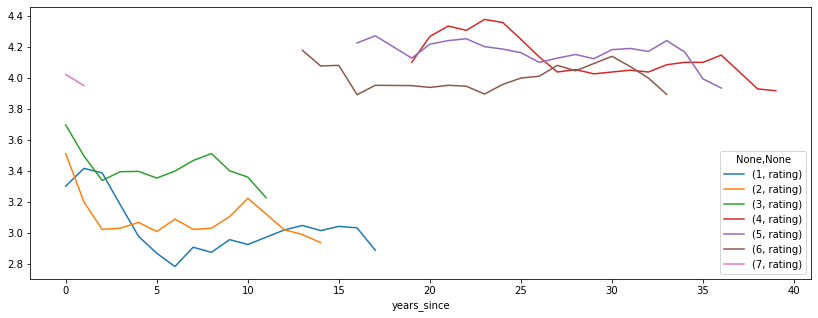

In [107]:
# newer episodes has lower ratings in comparison with the old ones
pd.concat(sw,axis=1).plot(figsize=(14,5));

In [108]:
# polynomial regression analysis
sw[1].reset_index().to_numpy()

array([[ 0.        ,  3.30078125],
       [ 1.        ,  3.41601562],
       [ 2.        ,  3.38671875],
       [ 3.        ,  3.1796875 ],
       [ 4.        ,  2.9765625 ],
       [ 5.        ,  2.8671875 ],
       [ 6.        ,  2.78125   ],
       [ 7.        ,  2.90625   ],
       [ 8.        ,  2.87304688],
       [ 9.        ,  2.95507812],
       [10.        ,  2.92382812],
       [11.        ,  2.97070312],
       [12.        ,  3.01757812],
       [13.        ,  3.046875  ],
       [14.        ,  3.01367188],
       [15.        ,  3.04101562],
       [16.        ,  3.03125   ],
       [17.        ,  2.88671875]])

In [109]:
# x - number of the years from production
# y - rating
x = sw[1].reset_index().to_numpy()[:, 0]
y = sw[1].reset_index().to_numpy()[:, 1]

In [110]:
# and finally polynomial regression - interpolation
from numpy import polyfit

t = np.linspace(0,20,num=21)
deg = 3 # lets try with 3 degrees first

coeffs = polyfit(x,y,deg=deg).reshape(-1,1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()  # multiply matrix and vector and flatten output vector

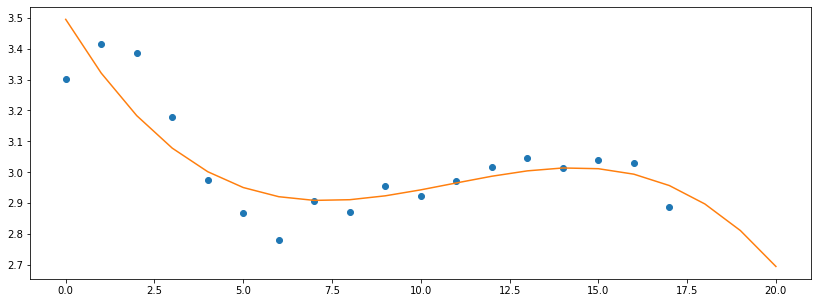

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(14,5))
ax.plot(sw[1], 'o');
ax.plot(t, Y); # prediction

In [112]:
# in the above plot we can see that 3rd degree polynomial is a good choice

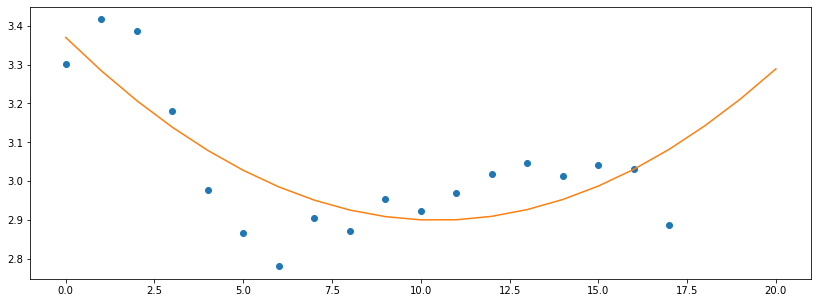

In [115]:
# lets see how it looks for 2nd degree
t = np.linspace(0,20,num=21)
deg = 2 # lets try with 3 degrees first

coeffs = polyfit(x,y,deg=deg).reshape(-1,1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()  # multiply matrix and vector and flatten output vector

fig, ax = plt.subplots(1, 1, figsize=(14,5))
ax.plot(sw[1], 'o');
ax.plot(t, Y); # prediction

In [116]:
# not the best fit

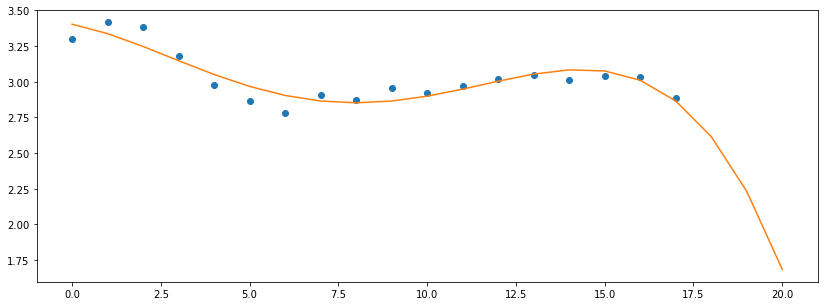

In [117]:
# what about 4th degree?
t = np.linspace(0,20,num=21)
deg = 4 # lets try with 3 degrees first

coeffs = polyfit(x,y,deg=deg).reshape(-1,1)
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()  # multiply matrix and vector and flatten output vector

fig, ax = plt.subplots(1, 1, figsize=(14,5))
ax.plot(sw[1], 'o');
ax.plot(t, Y); # prediction

In [118]:
# too good fit so we cannot predict the future
# anyway still we are not sure if the model is good - can give wrong results especially for outliers

<AxesSubplot:xlabel='year'>

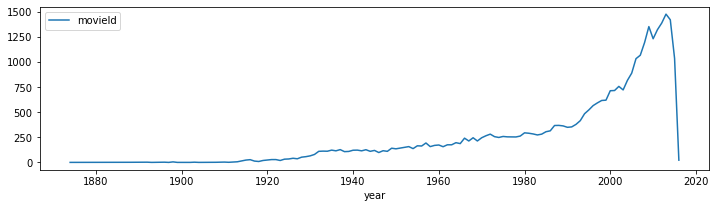

In [119]:
dfm[['movieId','year']].groupby('year').count().loc[0:].plot(figsize=(12,3))

In [120]:
X = dfm[['movieId', 'year']].groupby('year').count().loc[0:2014].reset_index().to_numpy()

In [121]:
# predictions - extrapolation
t = np.linspace(1900, 2030, num=41)
deg = 3
coeffs = polyfit(X[:,0],X[:, 1],deg=deg).reshape(-1,1)  # index 0 prod year, index 1 - number of movies
X = np.concatenate(list(map(lambda i: t.reshape(1, -1) ** i, reversed(range(deg + 1)))))
Y = (coeffs.T @ X).flatten()

In [122]:
Y

array([  46.28855117,   57.51391215,   65.53837614,   70.78268159,
         73.66756696,   74.6137707 ,   74.04203127,   72.3730871 ,
         70.02767668,   67.42653843,   64.99041083,   63.14003231,
         62.29614135,   62.87947638,   65.31077586,   70.01077826,
         77.40022201,   87.89984558,  101.93038742,  119.91258598,
        142.26717971,  169.41490707,  201.77650652,  239.77271651,
        283.82427548,  334.3519219 ,  391.77639421,  456.51843089,
        528.99877036,  609.6381511 ,  698.85731155,  797.07699016,
        904.7179254 , 1022.20085571, 1149.94651955, 1288.37565536,
       1437.90900162, 1598.96729677, 1771.97127925, 1957.34168754,
       2155.49926008])

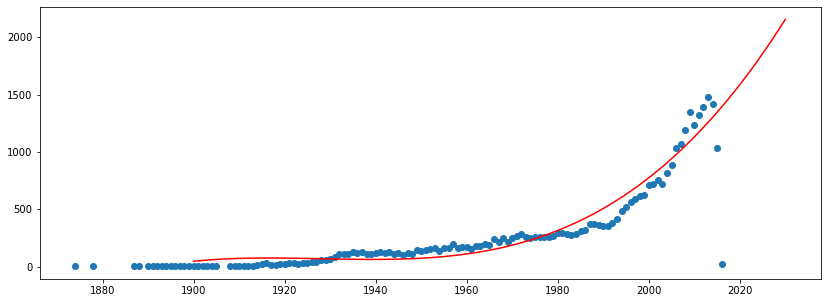

In [123]:
fig, ax = plt.subplots(1,1,figsize=(14,5))
ax.plot(dfm[['movieId', 'year']].groupby('year').count().loc[0:], 'o');
ax.plot(t, Y, 'r')